### Теория вероятностей и математическая статистика
##### Домашнее задание к уроку 7

<b>Задача 1</b><br>
<br>
Дана матрица объект-признак<br>
X = [[ 1.22401313, 2.30868478, 3.03636353, 2.69287214],<br>
[-0.18757272, 1.30337355, 5.12093014, 3.46363202],<br>
[-0.81094525, 1.82463398, 5.79686488, 1.86159445],<br>
[ 0.75129018, 2.67392052, 3.65529809, 1.66746094],<br>
[ 0.00972362, 1.97367255, 2.50594319, 1.69755173],<br>
[-0.62972637, 0.77750764, 2.84124027, 4.54410559],<br>
[ 2.29536229, 1.81206697, 1.95026215, 1.51874636],<br>
[ 0.0920418 , 2.26971361, 7.47708735, 2.61081203],<br>
[ 2.39252799, 3.17563985, 3.61420599, 5.10773362],<br>
[ 0.54983815, 2.87988651, 1.65752765, 1.59635987]]<br>

и значения целевой переменной

y = [ 9.26193358, 9.700363 , 8.67214805, 8.74796974, 6.18689108,
7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218]

1. Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости целевой переменной от значений этих признаков был максимальным. Другими словами, модель линейной регрессии на этих признаках должна давать максимальный R2. Например, берем признак х1 и х3 и строим модель y = b0 + b1 * x1 + b2 * x3, затем признаки x2 и x1 и тд
2. Является ли значимым получившееся уравнение регрессии?

In [1]:
import pandas as pd
import numpy as np

X = np.array([[ 1.22401313, 2.30868478, 3.03636353, 2.69287214],
[-0.18757272, 1.30337355, 5.12093014, 3.46363202],
[-0.81094525, 1.82463398, 5.79686488, 1.86159445],
[ 0.75129018, 2.67392052, 3.65529809, 1.66746094],
[ 0.00972362, 1.97367255, 2.50594319, 1.69755173],
[-0.62972637, 0.77750764, 2.84124027, 4.54410559],
[ 2.29536229, 1.81206697, 1.95026215, 1.51874636],
[ 0.0920418 , 2.26971361, 7.47708735, 2.61081203],
[ 2.39252799, 3.17563985, 3.61420599, 5.10773362],
[ 0.54983815, 2.87988651, 1.65752765, 1.59635987]])
y = np.array([ 9.26193358, 9.700363 , 8.67214805, 
                   8.74796974, 6.18689108, 7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218])

df = pd.DataFrame(X)     # Создаем датафрейм с признаками
target = pd.DataFrame(y) # Датафрейм с целевой переменной

# Первый набор признаков
x0_x1 = df[[0, 1]].values   # Выбираем 0 и 1 столбец из признаков
ones = np.ones((x0_x1.shape[0], 1)) # Столбец единиц
x0_x1_1 = np.hstack((ones, x0_x1))  # Пришиваем к выбранным признакам

XTX = x0_x1_1.T.dot(x0_x1_1)
np.linalg.det(XTX)        # Считаем определитель

349.7782033818831

Определетель не равен нулю, значит метод можно использовать

In [2]:
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x0_x1_1.T).dot(target)

print(b)

[[6.70781579]
 [0.40786841]
 [1.03360247]]


Уравнение линейной регрессии будет иметь вид:
$$
y = 6.70781579 + 0.40786841x_0 + 1.03360247x_1$$ 

In [3]:
from sklearn.linear_model import LinearRegression
model_x0_x1 = LinearRegression().fit(x0_x1_1, target)
print(type(model_x0_x1))
model_x0_x1.intercept_, model_x0_x1.coef_

<class 'sklearn.linear_model._base.LinearRegression'>


(array([6.70781579]), array([[0.        , 0.40786841, 1.03360247]]))

Коэффициенты совпадают, значит расчеты проведены правильно

In [4]:
def sum_of_squares(samples):
    return ((samples - samples.mean()) ** 2).sum()

In [5]:
z1 = x0_x1_1.dot(b)
R1 = 1 - ((target - z1)**2).sum() / sum_of_squares(target)
R1

0    0.181136
dtype: float64

$R^2$ для признаков $x_0$ и $x_1$ равен 0,18

In [6]:
# Второй набор признаков
x0_x2 = df[[0, 2]].values   # Выбираем 0 и 2 столбец из признаков
x0_x2_1 = np.hstack((ones, x0_x2))  # Пришиваем столбец единиц к выбранным признакам

XTX = x0_x2_1.T.dot(x0_x2_1)
np.linalg.det(XTX)        # Считаем определитель

2835.3600226240965

In [7]:
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x0_x2_1.T).dot(target)

print(b) # Коэффициенты для второго набора

[[3.62455695]
 [1.62531203]
 [1.21134979]]


In [8]:
z2 = x0_x2_1.dot(b)
R2 = 1 - ((target - z2)**2).sum() / sum_of_squares(target)
R2

0    0.763425
dtype: float64

$R^2$ для признаков $x_0$ и $x_2$ равен 0,76

In [9]:
# Третий набор признаков
x0_x3 = df[[0, 3]].values   # Выбираем 0 и 3 столбец из признаков
x0_x3_1 = np.hstack((ones, x0_x3))  # Пришиваем столбец единиц к выбранным признакам

XTX = x0_x3_1.T.dot(x0_x3_1)
np.linalg.det(XTX)        # Считаем определитель

1689.2124743606096

In [10]:
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x0_x3_1.T).dot(target)

print(b) # Коэффициенты для третьего набора

[[5.70686123]
 [0.68359949]
 [1.12650707]]


In [11]:
z3 = x0_x3_1.dot(b)
R2 = 1 - ((target - z3)**2).sum() / sum_of_squares(target)
R2

0    0.453297
dtype: float64

$R^2$ для признаков $x_0$ и $x_3$ равен 0,45

In [12]:
# Четвертый набор признаков
x1_x2 = df[[1, 2]].values   # Выбираем 1 и 2 столбец из признаков
x1_x2_1 = np.hstack((ones, x1_x2))  # Пришиваем столбец единиц к выбранным признакам

XTX = x1_x2_1.T.dot(x1_x2_1)
np.linalg.det(XTX)        # Считаем определитель

1427.8125776081442

In [13]:
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x1_x2_1.T).dot(target)

print(b) # Коэффициенты для четвертого набора

[[2.48896193]
 [1.60611956]
 [0.86269915]]


In [14]:
z4 = x1_x2_1.dot(b)
R2 = 1 - ((target - z4)**2).sum() / sum_of_squares(target)
R2

0    0.547948
dtype: float64

$R^2$ для признаков $x_1$ и $x_2$ равен 0,55

In [15]:
# Пятый набор признаков
x1_x3 = df[[1, 3]].values   # Выбираем 1 и 3 столбец из признаков
x1_x3_1 = np.hstack((ones, x1_x3))  # Пришиваем столбец единиц к выбранным признакам

XTX = x1_x3_1.T.dot(x1_x3_1)
np.linalg.det(XTX)        # Считаем определитель

701.7327364453139

In [16]:
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x1_x3_1.T).dot(target)

print(b) # Коэффициенты для пятого набора

[[1.91685221]
 [1.74373667]
 [1.31971882]]


In [17]:
z5 = x1_x3_1.dot(b)
R2 = 1 - ((target - z5)**2).sum() / sum_of_squares(target)
R2

0    0.606206
dtype: float64

$R^2$ для признаков $x_1$ и $x_3$ равен 0,61

In [18]:
# Шестой набор признаков
x2_x3 = df[[2, 3]].values   # Выбираем 2 и 3 столбец из признаков
x2_x3_1 = np.hstack((ones, x2_x3))  # Пришиваем столбец единиц к выбранным признакам

XTX = x2_x3_1.T.dot(x2_x3_1)
np.linalg.det(XTX)        # Считаем определитель

4547.328074863329

In [19]:
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x2_x3_1.T).dot(target)

print(b) # Коэффициенты для пятого набора

[[3.64001086]
 [0.70753914]
 [1.04851745]]


In [20]:
z6 = x2_x3_1.dot(b)
R2 = 1 - ((target - z6)**2).sum() / sum_of_squares(target)
R2

0    0.622442
dtype: float64

$R^2$ для признаков $x_2$ и $x_3$ равен 0,62

Максимальный $R^2$ получился для набора признаков $x_0$ и $x_2$ и равен 0,76

Проверим полученное уравнение регрессии на значимость

In [21]:
n = x0_x2.shape[0]
m = x0_x2.shape[1]

k1 = m
k2 = n - m - 1

k1, k2

(2, 7)

In [22]:
from scipy import stats

alpha = 0.05 # Уровень значимости

t = stats.f.ppf(1 - alpha, k1, k2) # Определяем критическую область
t

4.73741412777588

Пересчитаем коэффициенты второго набора, чтобы не было ошибок с переопределением

In [23]:
# Второй набор признаков
x0_x2 = df[[0, 2]].values   # Выбираем 0 и 2 столбец из признаков
x0_x2_1 = np.hstack((ones, x0_x2))  # Пришиваем столбец единиц к выбранным признакам

XTX = x0_x2_1.T.dot(x0_x2_1)
np.linalg.det(XTX)        # Считаем определитель

2835.3600226240965

In [24]:
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x0_x2_1.T).dot(target)

print(b) # Коэффициенты для второго набора

[[3.62455695]
 [1.62531203]
 [1.21134979]]


In [25]:
z2 = x0_x2_1.dot(b)
R2 = 1 - ((target - z2)**2).sum() / sum_of_squares(target) # Переопределяем R2 чтобы не ошибиться
R2

0    0.763425
dtype: float64

In [26]:
F = (R2 / k1) / ((1 - R2) / k2)
F

0    11.294439
dtype: float64

Значение статистики попадает в критическую область, тем самым уравнение регрессии признается значимым. 

<b>Задача 2</b>

Даны значения величины заработной платы заемщиков банка (salary) и значения их поведенческого кредитного скоринга (scoring):

salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]
Возьмём в качестве признака значение salary, а в качестве целевой переменной - scoring.

1. Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.
2. Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.
3. Посчитайте коэффициент детерминации.
4. Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
5. (доп) Посчитать среднюю ошибку аппроксимации

In [27]:
salary = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
scoring = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [28]:
# Вопрос 1. Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, 
# а затем с помощью метода наименьших квадратов.
### Уравнение для парной регрессии
b1 = (np.mean(salary * scoring) - np.mean(salary) * np.mean(scoring)) / (np.mean(salary ** 2) - np.mean(salary) ** 2)
b0 = np.mean(scoring) - b1 * np.mean(salary)

b0, b1

(444.1773573243596, 2.620538882402765)

In [29]:
### Метод наименьших квадратов
x = pd.DataFrame(salary)
y = pd.DataFrame(scoring)


ones_2 = np.ones((x.shape[0], 1)) # Столбец единиц
x_1 = np.hstack((ones_2, x))  # Пришиваем к выбранным признакам

XTX = x_1.T.dot(x_1)
np.linalg.det(XTX)        # Считаем определитель

349464.00000000023

In [30]:
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x_1.T).dot(y)

print(b) # Коэффициенты по методу МНК

[[444.17735732]
 [  2.62053888]]


Коэффициенты в обоих методах расчета совпадают, значит расчеты произведены правильно.

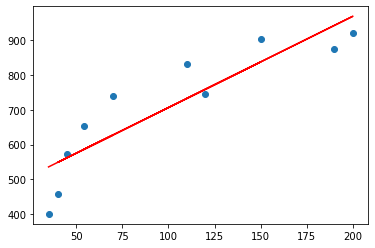

In [31]:
# Вопрос 2. Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.
from matplotlib import pyplot as plt
ox = salary
oy = scoring
y = b[0] + b[1]*ox

plt.scatter(ox, oy)
plt.plot(ox, y, color='red')

In [32]:
# Вопрос 3. Посчитайте коэффициент детерминации.
R_2 = 1 - ((oy - y)**2).sum() / sum_of_squares(oy)
R_2

0.7876386635293686

In [33]:
# Вопрос 4.Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
n = ox.shape[0]
m = 1
k1 = m
k2 = n - m - 1
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)   # Находим критическую область
t

5.317655071578714

In [34]:
F = (R_2 / k1) / ((1 - R_2) / k2)
F

29.67164085966451

Значение статистики попадает в критическую область, тем самым уравнение регрессии признается значимым.

Вопрос 5. (доп) Посчитать среднюю ошибку аппроксимации
$$\overline{A} = \frac{1}{n} \displaystyle\sum_{i=1}^{n} \Bigl| {{\frac{y_i - z_i}{y_i}} \Bigr|}.$$

In [79]:
A = (abs((oy - y) / oy)).sum() / n
print(f'Средняя ошибка аппроксимации равна: {A*100:.2f}%')

Средняя ошибка аппроксимации равна: 11.47%
